## Panel Data & Regression

##### Regression in panel data is a statistical analytic technique that examines the relationship over time and across many entities (people, nations, businesses, etc.) between one or more independent variables (predictors) and a dependent variable (outcome). In order to control for individual-specific effects and temporal trends, panel data combines cross-sectional and time series data, making it suited for analyzing both within-entity and between-entity differences. Pooled OLS, Fixed Effects, and Regression with Random Effects are typical techniques.

##### Panel data are treated as a single cross-sectional dataset by pooled OLS, which ignores individual heterogeneity. By incorporating dummy variables for each entity, Fixed Effects captures time-invariant variances and accounts for individual-specific effects. Unobserved heterogeneity is taken into account as a random error component by Random Effects, presuming it is uncorrelated with regressors.


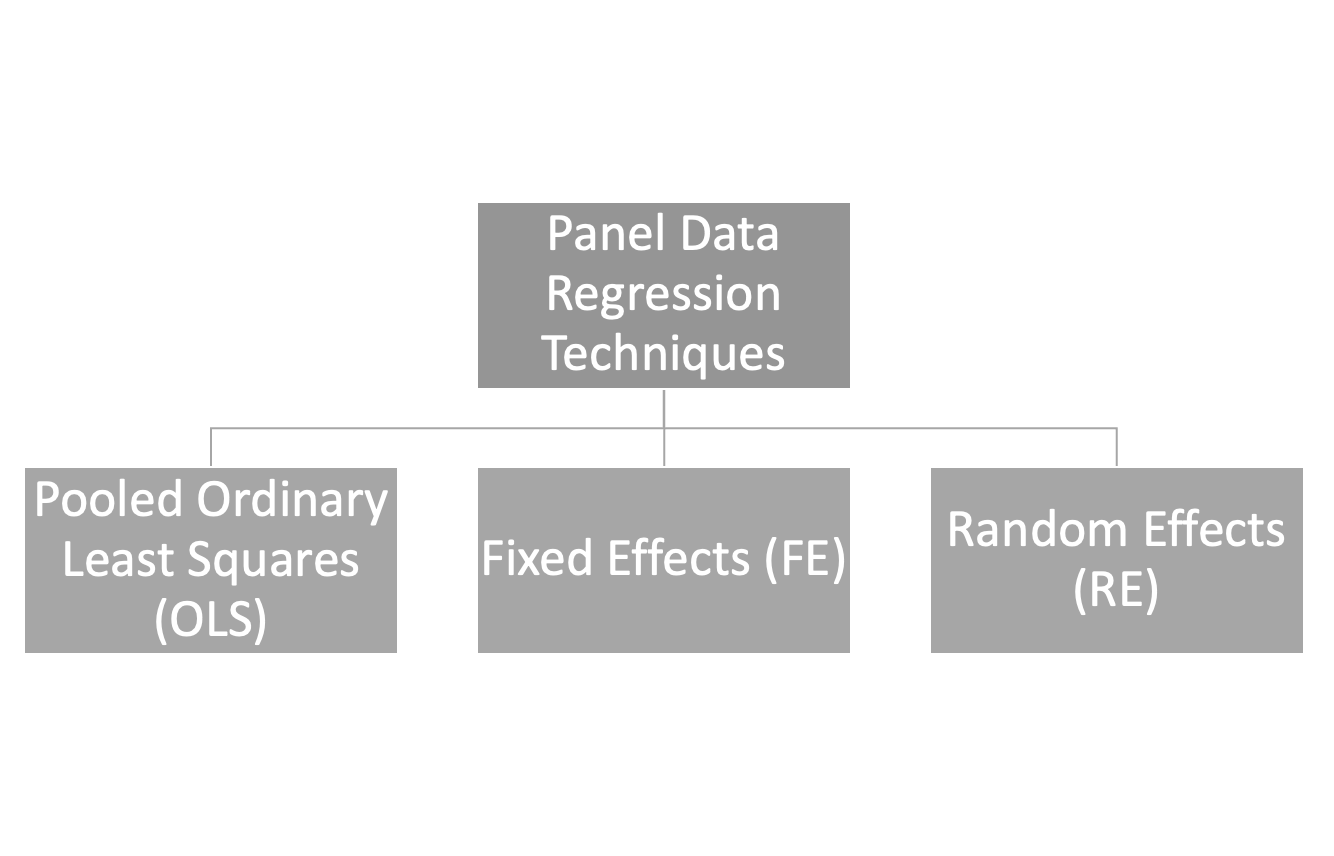

In [1]:
pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from linearmodels import PooledOLS
import statsmodels.api as sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/economic-data-9-countries-19802020/Economic Data - 9 Countries (1980-2020).csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


#### The stock prices are of 9 different countries namely United States of America, United Kingdom, India, Japan, Hong Kong, China, Germany, France & Spain. They are as follows:

In [5]:
stock_country = df[['stock index','country']]    
stock_country.drop_duplicates(['stock index','country'])

,stock index,country
0,NASDAQ,United States of America
41,FTSE 100,United Kingdom
82,Nifty 50,India
123,Nikkei 225,Japan
164,HSI,Hong Kong
205,SZCOMP,China
246,DAX 30,Germany
287,CAC 40,France
328,IEX 35,Spain


#### Assumptions associated with regression:

- Linearity
- Exogeneity
- Homoskedacity
- Non-Autocorrelation 
- Non-Stochastic Independent Variables
- Absence of Multicolinearity

### The center question of this research is finding the effect of inflation on stock prices in different countries so we will proceed with selected data

##### - The following code selects year, stock indices, inflation and the logarithimic index price from the entire dataset
##### - Logarithmic prices are considered to remove currency error as the index prices are of 9 different countries


In [6]:
df = pd.read_csv('/kaggle/input/economic-data-9-countries-19802020/Economic Data - 9 Countries (1980-2020).csv', usecols = ['stock index', 'year', 'inflationrate', 'log_indexprice'],\
 index_col = ['stock index', 'year'])
years = df.index.get_level_values('year').to_list()
df['year'] = pd.Categorical(years)

In [7]:
df

log_indexprice  inflationrate    year
stock index year                                         
NASDAQ      1980.0            2.23           0.14  1980.0
            1981.0            2.31           0.10  1981.0
            1982.0            2.28           0.06  1982.0
            1983.0            2.46           0.03  1983.0
            1984.0            2.40           0.04  1984.0
...                            ...            ...     ...
IEX 35      2016.0            3.97            NaN  2016.0
            2017.0            4.00           0.02  2017.0
            2018.0            3.93           0.02  2018.0
            2019.0            3.98           0.01  2019.0
            2020.0            3.91            NaN  2020.0

[369 rows x 3 columns]

In [8]:
#Removing null values fromm data
df.dropna()

log_indexprice  inflationrate    year
stock index year                                         
NASDAQ      1980.0            2.23           0.14  1980.0
            1981.0            2.31           0.10  1981.0
            1982.0            2.28           0.06  1982.0
            1983.0            2.46           0.03  1983.0
            1984.0            2.40           0.04  1984.0
...                            ...            ...     ...
IEX 35      2013.0            4.00           0.01  2013.0
            2015.0            3.98          -0.01  2015.0
            2017.0            4.00           0.02  2017.0
            2018.0            3.93           0.02  2018.0
            2019.0            3.98           0.01  2019.0

[326 rows x 3 columns]

## Running Pooled OLS

In [9]:
exog = sm.tools.tools.add_constant(df['inflationrate'])
endog = df['log_indexprice']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

/opt/conda/lib/python3.10/site-packages/linearmodels/panel/model.py:882: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


### Checking for Homoskedacity

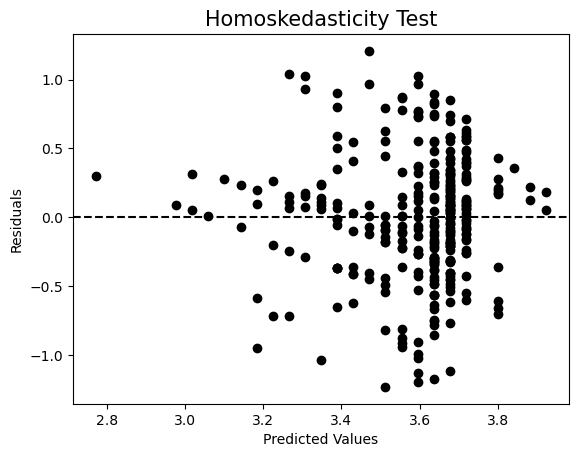

In [10]:
# Homoskedasticity
import matplotlib.pyplot as plt

# Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'black')
ax.axhline(0, color = 'k', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 10)
ax.set_ylabel('Residuals', fontsize = 10)
ax.set_title('Homoskedasticity Test', fontsize = 15)
plt.show()

As the values on the graph are spread out it suggest that there exists homoskedacity in the dataset, but this needs to be crosschecked with the White- and Breusch-Pagan-Test

In [11]:
# White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(df['inflationrate']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)

print('Results of White-Test')
hetTest1 = {'Statistic':['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'],
        'Value':white_test_results}
white_test = pd.DataFrame(hetTest1)
white_test

Results of White-Test


,Statistic,Value
0,LM-Stat,2.719000e+01
1,LM p-val,1.246713e-06
2,F-Stat,1.455712e+01
3,F p-val,8.256326e-07


In [12]:
# Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 

print('Results of Breusch-Pagan-Test')
hetTest2 = {'Statistic':['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'],
        'Value':breusch_pagan_test_results}
bp_test = pd.DataFrame(hetTest2)
bp_test

Results of Breusch-Pagan-Test


,Statistic,Value
0,LM-Stat,8.948699
1,LM p-val,0.002777
2,F-Stat,9.121401
3,F p-val,0.002703


#### As the p value for White-test is less than 0.05 and it supports the argument of how the graph of residuals and predicted values is scattered there is heteroskedacity present in the data violating the assumption.

### Checking the Non Multicolinearity assumption

In [13]:
# Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.21759634608037517


#### The outcome of the Durbin-Watson test will range from 0 to 4. The median (= 2) would suggest that no autocorrelation has been found, 0–2 indicates positive autocorrelation (the closer to zero the correlation, the higher it is), and 2–4 indicates negative autocorrelation (the closer to four, the higher it is). The outcome in our example, 0.21759634608037517, is unmistakably indicative of a substantial positive autocorrelation.

#### Thus the data violated both assumptions for Pooled OLS and we will have to perform FE and RE tests.

## Fixed Effects Model

In [14]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.tools.tools.add_constant(df['inflationrate'])
endog = df['log_indexprice']

# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 

#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:         log_indexprice   R-squared:                        0.2433
Estimator:                   PanelOLS   R-squared (Between):             -0.0247
No. Observations:                 326   R-squared (Within):               0.2433
Date:                Thu, Jul 27 2023   R-squared (Overall):              0.1075
Time:                        20:25:14   Log-likelihood                   -94.859
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      101.62
Entities:                           9   P-value                           0.0000
Avg Obs:                       36.222   Distribution:                   F(1,316)
Min Obs:                       25.000                                           
Max Obs:                       41.000   F-statistic (robust):             101.62
                            

/opt/conda/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## Random Effects Model

In [15]:
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 

#print results
print(re_res)

/opt/conda/lib/python3.10/site-packages/linearmodels/panel/model.py:2616: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                        RandomEffects Estimation Summary                        
Dep. Variable:         log_indexprice   R-squared:                        0.2538
Estimator:              RandomEffects   R-squared (Between):             -0.0229
No. Observations:                 326   R-squared (Within):               0.2433
Date:                Thu, Jul 27 2023   R-squared (Overall):              0.1072
Time:                        20:25:14   Log-likelihood                   -98.542
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      110.18
Entities:                           9   P-value                           0.0000
Avg Obs:                       36.222   Distribution:                   F(1,324)
Min Obs:                       25.000                                           
Max Obs:                       41.000   F-statistic (robust):             101.69
                            

#### With both models showing similar coefficients, we can conclude that a 1% change in inflation can cause the index price to fall by 5.1%. This is significant and acceptable as p value is less than 0.05 in both these cases. However, to decide between the two we can perform Hausman Test.

## Hausman-Test

In [16]:
import linearmodels.iv.model as lm
ht = lm.IV2SLS(dependent=df['log_indexprice'], exog= sm.tools.tools.add_constant(df['inflationrate']), 
               endog= df['log_indexprice'], instruments = df['log_indexprice']).fit(cov_type= 'homoskedastic', debiased=True)

print(ht)

/opt/conda/lib/python3.10/site-packages/linearmodels/iv/model.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/linearmodels/shared/linalg.py:64: RuntimeWarning: divide by zero encountered in divide
  return vecs @ np.diag(1 / np.sqrt(vals)) @ vecs.T
/opt/conda/lib/python3.10/site-packages/linearmodels/iv/model.py:605: RuntimeWarning: invalid value encountered in matmul
  q = vpmzv_sqinv @ (ex1.T @ ex1) @ vpmzv_sqinv


                          IV-2SLS Estimation Summary                          
Dep. Variable:         log_indexprice   R-squared:                      1.0000
Estimator:                    IV-2SLS   Adj. R-squared:                 1.0000
No. Observations:                 326   F-statistic:                 4.535e+28
Date:                Thu, Jul 27 2023   P-value (F-stat)                0.0000
Time:                        20:25:14   Distribution:                 F(2,323)
Cov. Estimator:         homoskedastic                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
const          -6.407e-14  1.347e-14    -4.7560     0.0000  -9.057e-14  -3.757e-14
inflationrate   3.525e-13   4.29e-14

#### The model has endogeneity as for the Hausman Test p value is less than 0.05 which creates a basis for rejecting null hypothesis leading to a conclusion that FE is more appropriate for this particular dataset.

## Conclusion

##### To conlcude we can move forward with the Fixed Effects model and derive the following equation:

$$IndexPrice_{index, year}\\ = 3.8 - 5.15*InflationRate_{index, year} + 3.8$$

##### This simply suggests that a 1% rise in inflation would bring down the price of a stock index by 5.15% for a similar time period.